In [3]:
import numpy as np

# 定义激活函数（Sigmoid）和它的导数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# 创建训练数据（输入和对应的输出）
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
# 输出目标
outputs = np.array([[0], [1], [1], [0]])  # XOR 问题

# 设置随机种子，方便结果复现
np.random.seed(42)

# 初始化权重和偏置
input_layer_neurons = inputs.shape[1]  # 输入层神经元数量
hidden_layer_neurons = 2  # 隐藏层神经元数量
output_layer_neurons = 1  # 输出层神经元数量

# 随机初始化权重和偏置
hidden_weights = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
hidden_bias = np.random.uniform(size=(1, hidden_layer_neurons))
output_weights = np.random.uniform(size=(hidden_layer_neurons, output_layer_neurons))
output_bias = np.random.uniform(size=(1, output_layer_neurons))

# 学习率
learning_rate = 0.1

# 训练神经网络
for epoch in range(10000):
    # 前向传播
    hidden_layer_input = np.dot(inputs, hidden_weights) + hidden_bias
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, output_weights) + output_bias
    predicted_output = sigmoid(output_layer_input)

    # 计算误差
    error = outputs - predicted_output

    # 反向传播
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer = d_predicted_output.dot(output_weights.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

    # 更新权重和偏置
    output_weights += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
    output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate
    hidden_weights += inputs.T.dot(d_hidden_layer) * learning_rate
    hidden_bias += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate

    # 可选：打印误差
    if epoch % 1000 == 0:
        print(f"Epoch {epoch} Error: {np.mean(np.abs(error))}")

# 输出最终预测结果
print("Final Predicted Output:")
print(predicted_output)


Epoch 0 Error: 0.4977550305860017
Epoch 1000 Error: 0.48962844155619734
Epoch 2000 Error: 0.430505591830237
Epoch 3000 Error: 0.335726373976126
Epoch 4000 Error: 0.17357496319517723
Epoch 5000 Error: 0.11181272498560173
Epoch 6000 Error: 0.08576413241547484
Epoch 7000 Error: 0.07130866479694536
Epoch 8000 Error: 0.061975191385776986
Epoch 9000 Error: 0.05537218409879135
Final Predicted Output:
[[0.05322146]
 [0.95171535]
 [0.95160449]
 [0.05175396]]


In [5]:
import numpy as np

# 定义激活函数（Sigmoid）和它的导数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# 创建训练数据（输入和对应的输出）
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
# 输出目标
outputs = np.array([[0], [1], [1], [0]])  # XOR 问题

# 设置随机种子，方便结果复现
np.random.seed(42)

# 初始化权重和偏置
input_layer_neurons = inputs.shape[1]  # 输入层神经元数量
hidden_layer1_neurons = 3  # 第一层隐藏层神经元数量
hidden_layer2_neurons = 2  # 第二层隐藏层神经元数量
output_layer_neurons = 1  # 输出层神经元数量

# 随机初始化权重和偏置
hidden_weights1 = np.random.uniform(size=(input_layer_neurons, hidden_layer1_neurons))
hidden_bias1 = np.random.uniform(size=(1, hidden_layer1_neurons))

hidden_weights2 = np.random.uniform(size=(hidden_layer1_neurons, hidden_layer2_neurons))
hidden_bias2 = np.random.uniform(size=(1, hidden_layer2_neurons))

output_weights = np.random.uniform(size=(hidden_layer2_neurons, output_layer_neurons))
output_bias = np.random.uniform(size=(1, output_layer_neurons))

# 学习率
learning_rate = 0.1

# 训练神经网络
for epoch in range(100000):
    # 前向传播
    hidden_layer1_input = np.dot(inputs, hidden_weights1) + hidden_bias1
    hidden_layer1_output = sigmoid(hidden_layer1_input)

    hidden_layer2_input = np.dot(hidden_layer1_output, hidden_weights2) + hidden_bias2
    hidden_layer2_output = sigmoid(hidden_layer2_input)

    output_layer_input = np.dot(hidden_layer2_output, output_weights) + output_bias
    predicted_output = sigmoid(output_layer_input)

    # 计算误差
    error = outputs - predicted_output

    # 反向传播
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    error_hidden_layer2 = d_predicted_output.dot(output_weights.T)
    d_hidden_layer2 = error_hidden_layer2 * sigmoid_derivative(hidden_layer2_output)

    error_hidden_layer1 = d_hidden_layer2.dot(hidden_weights2.T)
    d_hidden_layer1 = error_hidden_layer1 * sigmoid_derivative(hidden_layer1_output)

    # 更新权重和偏置
    output_weights += hidden_layer2_output.T.dot(d_predicted_output) * learning_rate
    output_bias += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate

    hidden_weights2 += hidden_layer1_output.T.dot(d_hidden_layer2) * learning_rate
    hidden_bias2 += np.sum(d_hidden_layer2, axis=0, keepdims=True) * learning_rate

    hidden_weights1 += inputs.T.dot(d_hidden_layer1) * learning_rate
    hidden_bias1 += np.sum(d_hidden_layer1, axis=0, keepdims=True) * learning_rate

    # 可选：打印误差
    if epoch % 1000 == 0:
        print(f"Epoch {epoch} Error: {np.mean(np.abs(error))}")

# 输出最终预测结果
print("Final Predicted Output:")
print(predicted_output)


Epoch 0 Error: 0.4997696391493412
Epoch 1000 Error: 0.4998937388021379
Epoch 2000 Error: 0.4998416978559803
Epoch 3000 Error: 0.4997636684703226
Epoch 4000 Error: 0.4996426637699034
Epoch 5000 Error: 0.49944600255407234
Epoch 6000 Error: 0.49910315041712877
Epoch 7000 Error: 0.4984348114780567
Epoch 8000 Error: 0.4968586094361822
Epoch 9000 Error: 0.49162972629566004
Epoch 10000 Error: 0.4652951018636178
Epoch 11000 Error: 0.40479378327252047
Epoch 12000 Error: 0.3752996718637253
Epoch 13000 Error: 0.3632102513899902
Epoch 14000 Error: 0.35662678309242424
Epoch 15000 Error: 0.35179251460520644
Epoch 16000 Error: 0.34316538116976497
Epoch 17000 Error: 0.1369511768275634
Epoch 18000 Error: 0.07485284401801086
Epoch 19000 Error: 0.055456139070491836
Epoch 20000 Error: 0.04559174008910105
Epoch 21000 Error: 0.03945032290248348
Epoch 22000 Error: 0.03518418120892469
Epoch 23000 Error: 0.032010250266999246
Epoch 24000 Error: 0.029535316812391202
Epoch 25000 Error: 0.027538349327775703
Epoch 

In [35]:
import tensorflow as tf
from keras.api.models import Sequential
from keras.api.layers import Dense
from keras.api.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import numpy as np

# 创建训练数据（XOR 问题）
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0], [1], [1], [0]])

# 数据标准化：将输入特征进行归一化/标准化处理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集（这里使用全部数据进行训练，实际中会有更多数据）
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 构建神经网络模型
model = Sequential()

# 第一层隐藏层，包含 8 个神经元，激活函数为 ReLU
model.add(Dense(8, input_dim=2, activation='relu'))

# 第二层隐藏层，包含 4 个神经元，激活函数为 ReLU
model.add(Dense(4, activation='relu'))

# 输出层，包含一个神经元，激活函数为 Sigmoid（二分类问题）
model.add(Dense(1, activation='sigmoid'))

# 编译模型，选择 Adam 优化器，损失函数使用二分类交叉熵，评估指标选择准确率
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型，使用 1000 次迭代，并设置验证集来防止过拟合
history = model.fit(X_train, y_train, epochs=100, batch_size=4, validation_data=(X_test, y_test), verbose=1)

# 打印最终的训练结果
print("Training finished")

# 在测试集上评估模型表现
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# 进行预测
predictions = model.predict(X_test)
print("Predictions on test data:")
print(predictions)
print("test:")
print(X_test)
print(y_test)

weights = model.get_weights()

# 输出权重
for i, weight in enumerate(weights):
    print(f"Weight {i}:")
    print(weight)

for layer in model.layers:
    weights = layer.get_weights()
    print(f"Layer: {layer.name}")
    for w in weights:
        print(w.shape)



Epoch 1/100


/Users/songguo77/miniconda3/envs/py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.0000e+00 - loss: 0.7250 - val_accuracy: 1.0000 - val_loss: 0.2641
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.0000e+00 - loss: 0.7221 - val_accuracy: 1.0000 - val_loss: 0.2649
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0000e+00 - loss: 0.7193 - val_accuracy: 1.0000 - val_loss: 0.2657
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.0000e+00 - loss: 0.7168 - val_accuracy: 1.0000 - val_loss: 0.2665
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.6667 - loss: 0.7143 - val_accuracy: 1.0000 - val_loss: 0.2672
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6667 - loss: 0.7119 - val_accuracy: 1.0000 - val_loss: 0.2679
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6667 - loss: 0.7094 - val_accuracy: 1.0000 - val_loss: 0.2684
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6667 - loss: 0.7070 - val_accuracy: 1.0000 - val_los

NameError: name 'x' is not defined

In [33]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.17.0
GPU available: []


2024-12-23 13:44:19.452092: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100


/Users/songguo77/miniconda3/envs/py310/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.12080
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7823  
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4902 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1673  
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.93393
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7794  
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6127  
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5292  
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4328  
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3323  
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2728 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2198
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1821  
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1458 
Epoch 15/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1179  
Epoch 16/100
4/4 ━━━━━━

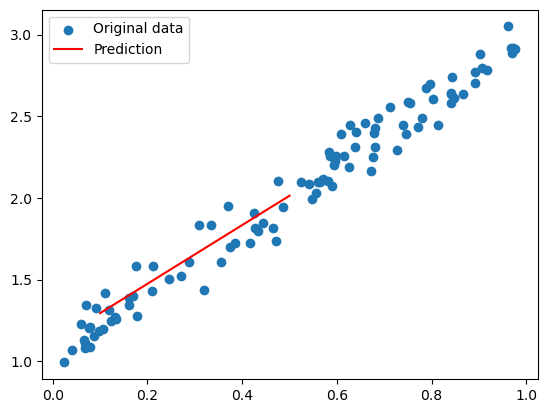

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# 生成随机数据
x = np.random.rand(100, 1)
y = 2 * x + 1 + 0.1*np.random.randn(100, 1)

# 定义模型
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1])
])

# 编译模型
model.compile(optimizer='sgd', loss='mean_squared_error')

# 训练模型
model.fit(x, y, epochs=100)

# 预测新数据
x_test = np.array([[0.1], [0.5]])
y_pred = model.predict(x_test)
print(y_pred)

# 可视化
plt.scatter(x, y, label='Original data')
plt.plot(x_test, y_pred, color='red', label='Prediction')
plt.legend()
plt.show()

In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU available:", tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.17.0
GPU available: []


In [4]:
import schedule
import os
import time

def remind():
    os.system('osascript -e \'display notification "记得总结今天的工作！" with title "总结提醒"\'')
    print("现在是下午5点，记得做总结！")

# 每天下午 5 点执行
schedule.every().day.at("13:46").do(remind)

while True:
    schedule.run_pending()
    time.sleep(1)


现在是下午5点，记得做总结！


KeyboardInterrupt: 